# Übung 2 - Bildverarbeitungsoperatoren 

## Bearbeitungszeitraum

**Bearbeitungsbegin:** ...
<br>
**Abgabe:** 25.11.2022, 23:55 Uhr

---

## Aufgabenbeschreibung

Ziel dieser Übung ist die praktische Anwendung, der in der Vorlesung eingeführten Bildverarbeitungsoperatoren, wie z.B. Filterung im Ortsraum zur globalen Rauschunterdrückung, morphologische Operatoren usw.


**Hinweise zur Abgabe**

- Füllen Sie unbedingt die erste Zelle unterhalb der Überschrift mit Name und Matr.-Nr. aus!
- Entfernen Sie vor dem Upload alle Ausgaben aus dem Notebook!
- Die Bilddatei muss nicht abgegeben werden.


### Viel Erfolg!

### Aufgabenbeschreibung
Der Begriff **Leukämie**, auch Blutkrebs genannt, steht für eine Gruppe von Krebserkrankungen des blutbildenden Systems. Die einzelnen Formen unterscheiden sich bezüglich Häufigkeit, Ursachen, Behandlungsmöglichkeiten und Heilungsaussichten zum Teil stark voneinander. Leukämie geht von den Knochenmarkszellen aus und ist in der Regel durch eine stark erhöhte Zahl weißer Blutkörperchen im Blut gekennzeichnet. 

![BlutBild](Blutbild_LeukaemieVsGesund.jpg)


***Eine Leukämie geht mit Veränderungen im Blutbild einher*** (Bildquelle: Apotheken-umschau)




             

### 1. Aufgabe - Einlesen und Visualisieren eines Leukämie(CLL)-Zellenbildes

Die chronische lymphatische Leukämie (CLL) ist ein niedrigmaligne, in der westlichen Welt die am häufigsten vorkommende Leukämieform. Die Diagnose dieser Erkrankung erfolgt zunächst im Blutbild. Lesen sie die Datei "leukaemie.jpg" ein, um ein solches Blutbild darzustellen. Visualisieren Sie das eingelesene Bild (verwenden Sie die Funktionen `imshow` und `show`). Konvertieren Sie die .jpg-Datei in ein numpy-array.



In [ ]:
#imports 

%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import scipy
import random


<class 'numpy.ndarray'>
[[[235 228 220]
  [230 221 214]
  [224 213 207]
  ...
  [206 167 168]
  [204 168 168]
  [204 168 170]]

 [[238 231 223]
  [233 226 218]
  [228 217 211]
  ...
  [206 167 168]
  [206 167 168]
  [204 168 170]]

 [[239 235 224]
  [237 230 220]
  [232 221 215]
  ...
  [206 167 170]
  [206 167 170]
  [204 168 170]]

 ...

 [[225 196 198]
  [224 195 197]
  [222 193 197]
  ...
  [207 177 177]
  [205 173 176]
  [205 173 178]]

 [[218 192 195]
  [217 191 194]
  [218 189 193]
  ...
  [215 180 178]
  [212 176 178]
  [210 174 178]]

 [[218 192 195]
  [217 191 194]
  [218 189 193]
  ...
  [217 179 176]
  [215 175 176]
  [212 173 176]]]


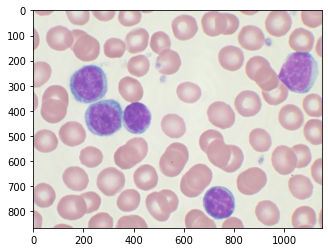

In [ ]:
# function für zeigen 2 images

def show2images(img1, img2, cmap1, cmap2):
    figure, img_array = plt.subplots(1,2, figsize = (40,40))
    img_array[0].imshow(img1, cmap1)
    img_array[1].imshow(img2, cmap2)


# matplotlib uses RGB but CV2 uses BGR so we need to convert them
def bgr2rgb(img):
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return rgb_img

# convert gray
def rgb2gray(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # yine bgr veriyor
    img = bgr2rgb(img)
    return img

def bgr2gray(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # yine bgr veriyor
    return img

# convert rgb
def gray2rgb(img):
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) # yine bgr veriyor
    img = bgr2rgb(img)
    return img

# einlesen
img_path = "/content/leukaemie.jpg"
bgr_img = cv2.imread(img_path) # img is already a numpy array
#convert rgb
rgb_img = bgr2rgb(bgr_img)
print(type(rgb_img))
print(rgb_img)
plt.imshow(rgb_img)

#convert gray
gray_img = rgb2gray(rgb_img)


### 2. Aufgabe - Orts- und Frequenzraumanalyse sowie Filterung des Zellbildes

Im Rahmen dieser Aufgabe sollen Sie Ihre Kenntnisse mit globalen Bildstörungen einsetzen, indem Sie auf diese Störungen zurückzuführende Veränderungen im Frequenzraum erkennen und eliminieren. Um solch eine spektrale Bildanalyse durchführen zu können, müssen Sie mittels Fourierttrasformation vom Ortsraum in den Frequenzraum wechseln. Dazu können Sie aus `numpy` die ensprechende mathematische Funktion namens `fft` benutzen. Ebenfalls lässt sich die `fft` Funktion der `cv2` library einsetzen und ist ggf. bis zu 3x performanter. 

**2.1: Globale Bildstörungen erzeugen, Orts- sowie Frequenzraum darstellen**
- Erzeugen Sie im ersten Schritt globale Bildstörungen (Rauschen). Globale Bildstörung kann z.B. Gauss-Rauschen, Salz-Pfeffer-Rauschen o.ä. periodische Bildartefakte sein (vgl. VL-Folien).
- Wenden Sie das erzeugte Rauschen auf das Bild `leukaemie.jpg` an. 
- Wenden Sie die Fouriertransformation sowohl auf das Grauwertbild als auch auf die verrauschte Kopie des Grauwertbildes an.
- Visualisieren Sie beide Bilder mit ihren jeweiligen Frequenzspektren dar (`subplot` mit 2x2-Raster)


**2.2: Histogramme erzeugen**
- Visualisieren Sie die Histogramme des verrauschten sowie des unverarbeiteten Originalbildes, um die Grauwertverteilungen darzustellen.


**2.3: Filterung im Frequenzraum**
- Führen Sie eine Filterung des verrauschten Bildes (im Frequenzraum!) durch, um die zuvor (in der Teilaufgabe 2.1) erzeugten Störungen wieder weitesgehend zu eliminieren
- Visualisieren Sie das gefilterte Bild sowie das dazugehörige Frequenzspektrum nebeneinander dar.

**2.4: Erläuterung der verwendeten Methoden**
- Erläutern Sie stichpunktartig die Funktionsweise der verwendeten Funktionen zur Rauscherzeugung sowie Rauschunterdrückung.
- Erläutern Sie stichpunktartig die Funktionsweise der eingesetzten FFT sowie iFFT! 


**Hinweise:**
- Beim Einlesen des Bildes (z.B. mit `imread` aus der Bibliothek `skimage`) den Parameter `as_gray` gleich 'True' setzen und mit diesem Graubild weiterarbeiten. Beim plotten müssen Sie ggf. dennoch `cmap='gray'` setzen.
- Falls Sie Gauss-Rauschen erzeugen, dann sollte der Sigma-Wert nicht das Maximum von 1.0 überschreiten - denn es reicht ein leichtes Rauschen, das zusätzlich zum Ortsraum auch im Frequenzraum erkennbar ist.
- Vor der Anwendung der Fouriertransformation müssen Sie die Bildgröße anpassen, da das Originalbild nicht quadratisch ist (vgl. VL-Folien zur FFT: Anzahl Zeilen/Spalten muss identisch sein!)
- Führen Sie die Filterung im Frequenzraum durch, weil es sich um eine globale Bildstörung handelt! Überlegen Sie vorher, was der Filter bewirken soll (glätten? Kanten hervorheben?, ..) und probieren Sie unterschiedliche Filterkerngrößen (3x3, 5x5,7x7) aus! Und denken Sie an die anschließende Rücktransformation!



**2.1.1: Globale Bildstörungen erzeugen**

In [ ]:
def add_salt_and_pepper_noise(img):

    img2 = img.copy() # it was overwriting
    row, col, rgb = img2.shape
    amount = int(row*col/50)
    for i in range(amount):
      x_coord = random.randint(0, row-1)
      y_coord = random.randint(0, col-1)
      img2[x_coord][y_coord] = 0

    for i in range(amount):
      x_coord = random.randint(0, row-1)
      y_coord = random.randint(0, col-1)
      img2[x_coord][y_coord] = 255

    print("shape of noised img: ",img2.shape)
    return img2

noised_img = add_salt_and_pepper_noise(gray_img)
show2images(gray_img, noised_img, None, None)


shape of noised img:  (866, 1149, 3)


**2.1.2: Orts- sowie Frequenzraum darstellen**

In [ ]:
# cut image from center by using width and height

def crop_center(img, w, h):
    size = img.shape
    print("img size in the beginning: " , size)
    
    startx = (size[0] // 2) - int(w/2)  # find middle x value 
    starty = (size[1] // 2) - int(h/2)  # find middle y value
    
    new_img = img[startx:startx + w, starty:starty + h]
    
    print("img size at the end : ", new_img.shape)
    return new_img

min_img_shape = min(gray_img.shape[:2])

cropped_rgb_img = crop_center(rgb_img, min_img_shape,min_img_shape)
cropped_gray_img = crop_center(gray_img, min_img_shape,min_img_shape)
cropped_noised_img = crop_center(noised_img, min_img_shape,min_img_shape)


img size in the beginning:  (866, 1149, 3)
img size at the end :  (866, 866, 3)
img size in the beginning:  (866, 1149, 3)
img size at the end :  (866, 866, 3)
img size in the beginning:  (866, 1149, 3)
img size at the end :  (866, 866, 3)


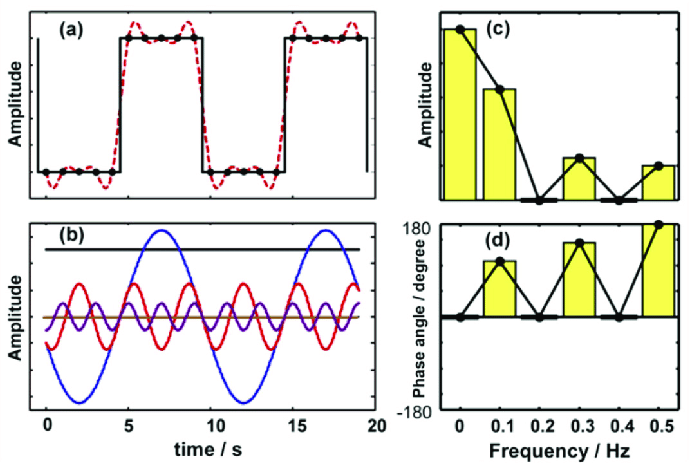

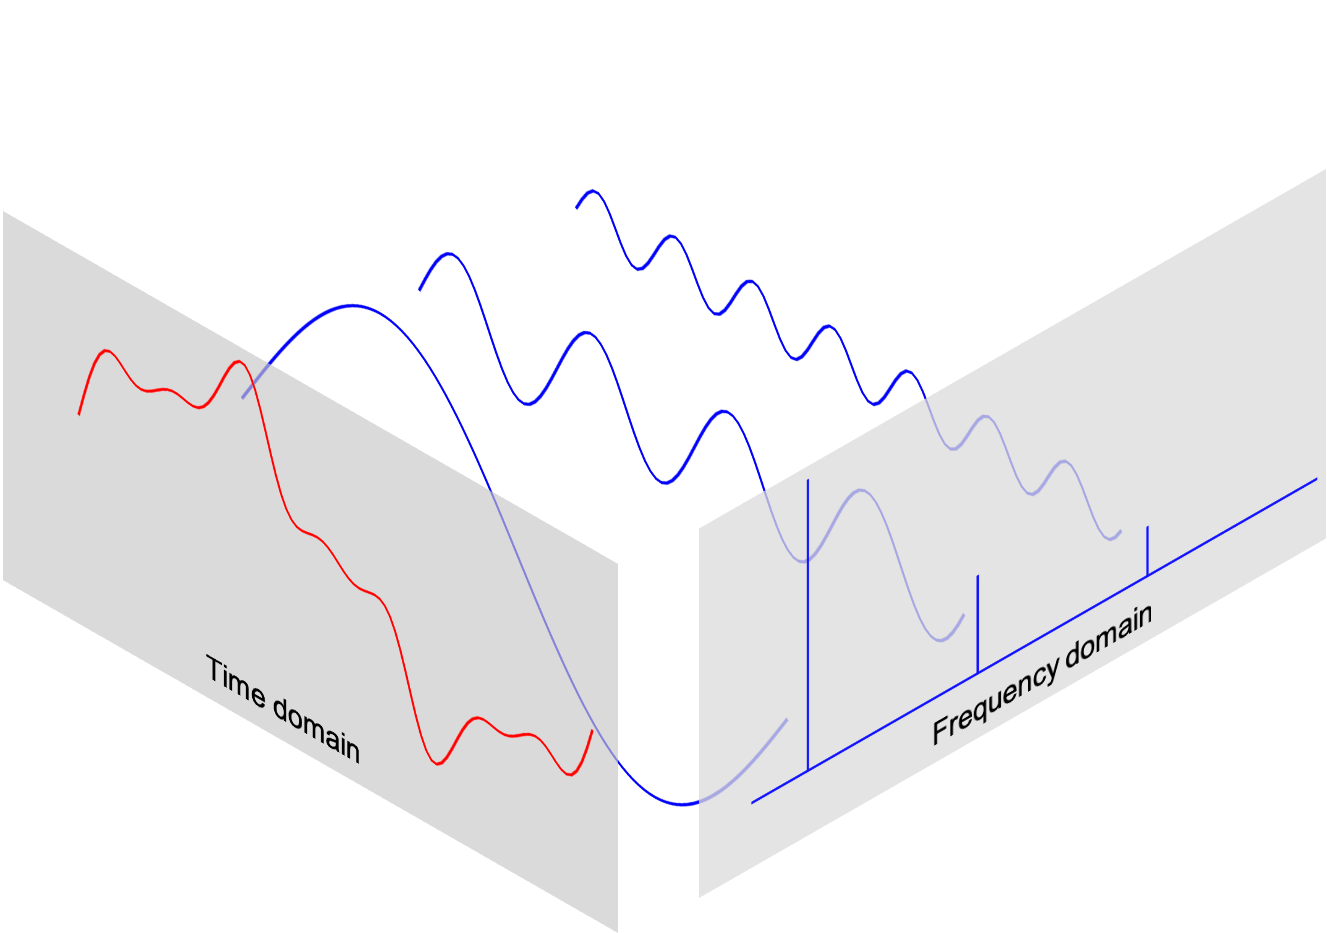

In [ ]:

def img2fft(image):
  ''' 
  fft.fft2(img_array, s=None, axes=(- 2, - 1), norm=None)
  2 dimensional discrete fourier transform
  s = shape (if the given shape is smaller than that of the input, the input is cropped.
  If it is larger, the input is padded with zeros.)
  norm = backward, orthogonal ...
  '''
  # image[:,:,1] -> 3 dimention'dan bir tanesine indirgemek icin, sonuc (838,838) olur
  # np.float -> int yerine daha geniş bir saklama kapasitesi sunmak için
  # complex output -> imaginary sayıları da yazdırabilmek için

  f = cv2.dft(np.float32(image[:,:,1]), flags=cv2.DFT_COMPLEX_OUTPUT)
  print(f.shape)

  # asagıdaki kod olmuyor cunku cv output olarak 2 channel'lı (imaginary ve gercek) veriyor ama o vermiyor.
  # bize de channel lazım cunku fftshift oyle kabul ediyor
  # f2 = np.fft.fft2(image[:,:,1])
  # print("------------------")
  # print(f2.shape)

  '''
  fft.fftshift(f, axes=None)
  Shift the zero-frequency component to the center of the spectrum
  axes = which axes to shift
  '''
  fshift = np.fft.fftshift(f)

  # her bir dalganın amplitude'unu almakla aynı sey
  # SORU : NEDEN LOGU CARPIYORUZ??????????? 20000'le de 0.00001'le de aynı sonuc geliyor
  # cunku sayılar ne kadar buyurse buyusun aynı scale olacaklar.
  magnitude_spectrum = np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))

  return magnitude_spectrum, fshift



magnitude_spectrum, dftshift_cropped_gray_img = img2fft(cropped_gray_img)
magnitude_spectrum2, dftshift_cropped_noised_img = img2fft(cropped_noised_img)

show2images(cropped_gray_img, cropped_noised_img, 'gray', 'gray')
show2images(magnitude_spectrum, magnitude_spectrum2, 'gray', 'gray')



**2.2: Histogramme erzeugen**

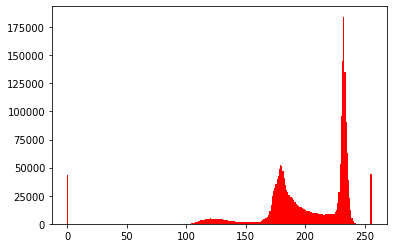

In [ ]:
# ravel makes arrays flat
#plt.hist ( array, binsize,  )
#binsize = how many buckets should I split
#range = The lower and upper range of the bins.
plt.hist(cropped_gray_img.ravel(), 256, (0,256) , color = 'royalblue')
plt.show()
plt.hist(cropped_noised_img.ravel(), 256,(0,256) , color = 'red')
plt.show()



**2.3: Filterung im Frequenzraum**

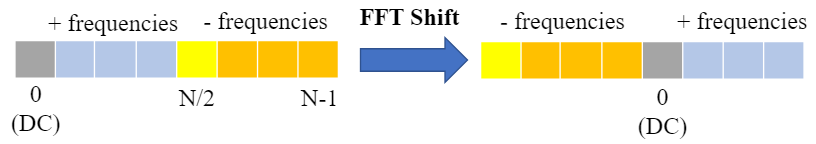

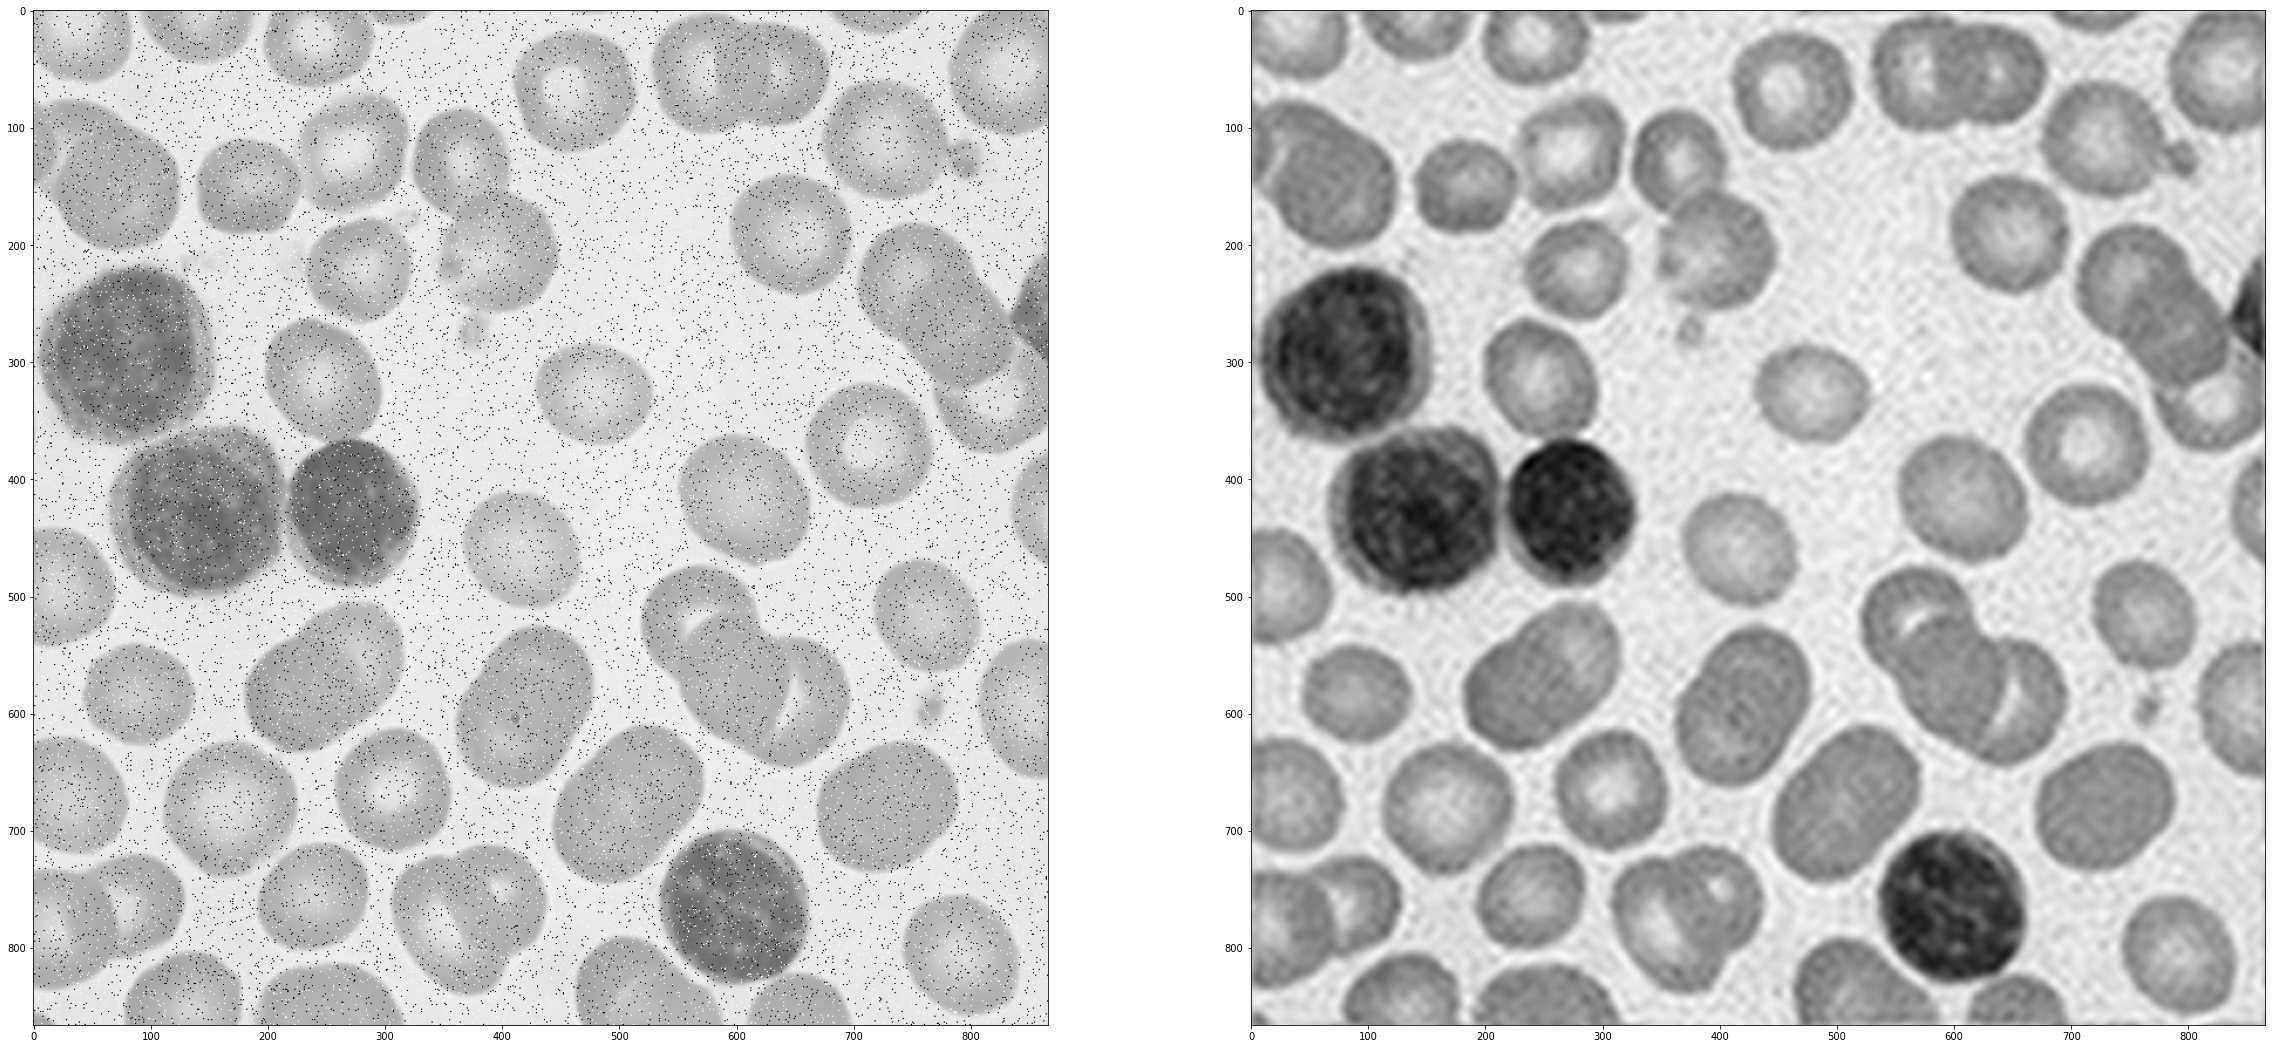

In [ ]:
def mask_img(img, length):

  rows, cols = img[:,:,1].shape
  crow,ccol = rows//2 , cols//2
  # create a mask first, center square is 1, remaining all zeros
  # shift halindeki de 2 channel'lı diye sonu 2
  mask = np.zeros((rows,cols,2),np.uint8)
  mask[crow-length:crow+length, ccol-length:ccol+length] = 1

  return mask

# apply mask and inverse DFT
masked_shift = dftshift_cropped_noised_img*mask_img(cropped_noised_img, 60)
masked_ishift = np.fft.ifftshift(masked_shift)
img_back = cv2.idft(masked_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

show2images(cropped_noised_img, img_back, 'gray', 'gray')



### 3. Morphologische Operationen
 
**3.1 Strukturen verkleinern/vergrößern, um schmale Verbindungen zu lösen/Lücken zu schließen**

Führen Sie folgende morphologische Operationen mit dem Originalbild `leukaemie.jpg` durch:
    - Erosion
    - Dilation
    - Opening
    - Closing
 
Hierbei können Sie sowohl `Skimage`- als auch `CV2`-Bibliotheken benutzen. Stellen Sie Ihre Ergebnisse in einem 2x2-subplot dar. 


**3.2 Merkmalsextraktion**

- Welche, der in der Teilaufgabe 3.1 eingesetzten morphologischen Operationen ist am besten geeignet, falls die Anzahl der Zellen im Bild gezählt werden soll? 

- Zählen Sie ALLE Zellen in diesem Bild, nachdem sie eine "passende" morphologische Operation durchgeführt haben. Tipp: Zur Detektion von Kreisen/Ellipsen können Sie die "Hough-Transformation" anwenden.

**3.3. Bonus**
Zählen Sie NUR die lila gefärbten Leukozyten.
 

3.1 Strukturen verkleinern/vergrößern, um schmale Verbindungen zu lösen/Lücken zu schließen

In [ ]:
kernel_erosion = np.ones((5,5),np.uint8)
kernel_dilation = np.ones((5,5),np.uint8)
kernel_opening = np.ones((5,5),np.uint8)
kernel_closing = np.ones((5,5),np.uint8)


channel = rgb_img.shape[2]



erosion = rgb_img.copy()
dilation = rgb_img.copy()
opening  = rgb_img.copy()
closing  = rgb_img.copy()

for i in range(channel):

  erosion[:,:,i] = cv2.erode(rgb_img.copy()[:,:,i],kernel_erosion,iterations = 3)

  dilation[:,:,i] = cv2.dilate(rgb_img.copy()[:,:,i],kernel_dilation,iterations = 3)

  opening[:,:,i] = cv2.morphologyEx(rgb_img.copy()[:,:,i], cv2.MORPH_OPEN, kernel_opening,iterations = 5)

  closing[:,:,i] = cv2.morphologyEx(rgb_img.copy()[:,:,i], cv2.MORPH_CLOSE, kernel_closing,iterations = 5)


show2images(rgb_img, erosion, None, None)
show2images(erosion, dilation, None, None)
show2images(opening, closing, None, None)

3.2 Merkmalsextraktion

Welche, der in der Teilaufgabe 3.1 eingesetzten morphologischen Operationen ist am besten geeignet, falls die Anzahl der Zellen im Bild gezählt werden soll?

Zählen Sie ALLE Zellen in diesem Bild, nachdem sie eine "passende" morphologische Operation durchgeführt haben. Tipp: Zur Detektion von Kreisen/Ellipsen können Sie die "Hough-Transformation" anwenden.

In [ ]:
img = cv2.imread("/content/leukaemie.jpg")
  
# Convert to grayscale.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))
  
# Apply Hough transform on the blurred image.
# method = hough gradient (türev)
# dp = 1.5 (önerilen cozunurluk)
# minDistance = min distance between circles centers
# param1 = higher threshold
# param2 = lower threshold
detected_circles = cv2.HoughCircles(gray_blurred, 
                   cv2.HOUGH_GRADIENT, 1.5, 35, param1 = 50,
               param2 = 30, minRadius = 40, maxRadius = 70)
  
# Draw circles that are detected.
if detected_circles is not None:
  
    print(detected_circles.shape)
    print(len(detected_circles[0, :]))
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv2.circle(img, (a, b), r, (0, 255, 0), 2)
  
        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
        plt.imshow(img)

(1, 72, 3)
72


In [ ]:
def find_circle(img):
    # Convert to grayscale.
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
      
    # Blur using 3 * 3 kernel.
    gray_blurred = cv2.blur(gray, (3, 3))
      
    detected_circles = cv2.HoughCircles(gray_blurred, 
                      cv2.HOUGH_GRADIENT, 1.5, 35, param1 = 50,
                  param2 = 30, minRadius = 40, maxRadius = 70)
      
    # Draw circles that are detected.
    if detected_circles is not None:
      
        print(detected_circles.shape)
        print(len(detected_circles[0, :]))
        # Convert the circle parameters a, b and r to integers.
        detected_circles = np.uint16(np.around(detected_circles))
      
        for pt in detected_circles[0, :]:
            a, b, r = pt[0], pt[1], pt[2]
      
            # Draw the circumference of the circle.
            cv2.circle(img, (a, b), r, (0, 255, 0), 2)
      
            # Draw a small circle (of radius 1) to show the center.
            cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
    return img

dilation_img = find_circle(dilation.copy())
erosion_img = find_circle(erosion.copy())
opening_img = find_circle(opening.copy())
closing_img = find_circle(closing.copy())

show2images(dilation_img,erosion_img, None,None)
show2images(opening_img,closing_img, None,None)

3.3. Bonus Zählen Sie NUR die lila gefärbten Leukozyten.

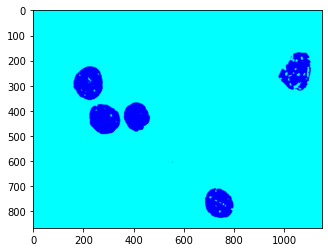

In [ ]:
# assign red channel to zeros
without_red_img = rgb_img.copy()
without_red_img[:,:,0] = np.zeros([without_red_img.shape[0], without_red_img.shape[1]])  #-- Contains pixels having the gray color--
ret,thresh1 = cv2.threshold(without_red_img,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh1)

(1, 5, 3)
5


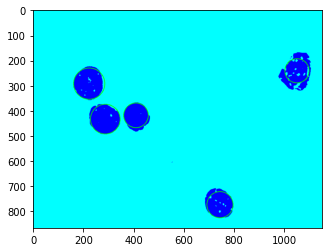

In [ ]:
big_cell_image = find_circle(thresh1)
plt.imshow(big_cell_image)

**4. BONUSAUFGABE:** Detektieren Sie im folgenden Bild **alle Pfeile**. Treffen Sie die Entscheidung, ob die Pfeilspitze nach **rechts** oder nach **links** zeigt. 

![pfeile.png](attachment:pfeile.png)

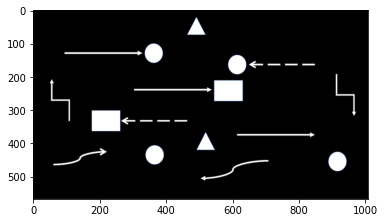

In [ ]:
# einlesen
img_path2 = "/content/pfeile.png"
bgr_img2 = cv2.imread(img_path2)
#convert rgb
rgb_img2 = bgr2rgb(bgr_img2)
plt.imshow(rgb_img2)

Bir çizgiyi tespit etmek için teta ve rho kullanılır. \
Bu bilgiler aşağıda göründüğü gibi formalize edilir. \
x cos⁡(θ)+y sin⁡(θ)=ρ \
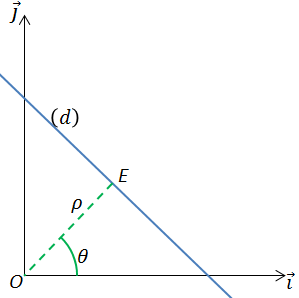

Number of contours found: 25


'\ncoordinates = []\nfor cnt in contours:\n        # [point_x, point_y, width, height] = cv2.boundingRect(cnt)\n    approx = cv2.approxPolyDP(\n        cnt, 0.07 * cv2.arcLength(cnt, True), True)\n    if len(approx) == 3:\n        coordinates.append([cnt])\n        cv2.drawContours(rgb_img3, [cnt], 0, (0, 0, 255), 3)\n\ncv2.imwrite("result.png", rgb_img3)\n'

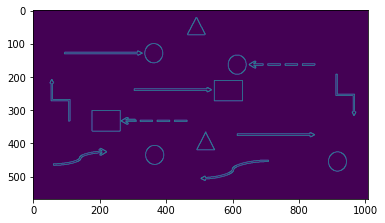

In [ ]:
rgb_img3 = rgb_img2.copy()
#takes upper and lower threshold
rgb_img3 = rgb2gray(rgb_img3)
edged = cv2.Canny(rgb_img3, 30, 200)
plt.imshow(edged)
  
# Finding Contours
# hierarchy gives the relationship between contours for ex: parent child
# RETR_LIST: Parents and kids are equal under this rule, and they are just contours
# RETR_EXTERNAL: return only extreme, All child contours are left behind.
# Use a copy of the image 
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of contours found:", len(contours))


In [ ]:
# find all lines 
# rho : 1
# theta: We use 1 degree CV_PI/180
# threshold: The minimum number of intersections to "*detect*" a line
lines = cv2.HoughLines(edged,1,np.pi/180,145)
print(lines.shape)
print("lines:", lines)


(9, 1, 2)
lines: [[[236.          1.5707964]]

 [[241.          1.5707964]]

 [[371.          1.5707964]]

 [[126.          1.5707964]]

 [[131.          1.5707964]]

 [[376.          1.5707964]]

 [[330.          1.5707964]]

 [[334.          1.5707964]]

 [[161.          1.5707964]]]
